In [45]:
import pandas as pd
import numpy as np

In [46]:
whole_data = pd.read_csv('mercedesbenz.csv')

In [47]:
whole_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [48]:
whole_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data = pd.read_csv('mercedesbenz.csv', usecols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [50]:
data.head()

,X1,X2,X3,X4,X5,X6
0,v,at,a,d,u,j
1,t,av,e,d,y,l
2,w,n,c,d,x,j
3,t,n,f,d,x,l
4,v,n,f,d,h,d


In [51]:
for col in data.columns:
    print(col, ':', len(data[col].unique()), 'labels') ## .unique 

X1 : 27 labels
X2 : 44 labels
X3 : 7 labels
X4 : 4 labels
X5 : 29 labels
X6 : 12 labels


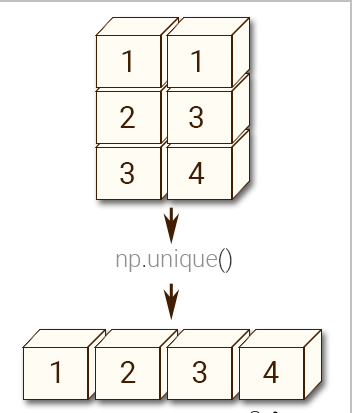

#### the below operation is one hot encoding. after the command got executed, the number of additinal columns created will be displayed. 

In [52]:
pd.get_dummies(data,drop_first=True).shape  

(4209, 117)

In [53]:
# Lets find the top 10 most frequent categories for the variable x2
data.X2.value_counts().sort_values(ascending = False).head(20)

as    1659
ae     496
ai     415
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
z       19
ag      19
Name: X2, dtype: int64

In [54]:
# Lets make a list with the most frequent categories of the variable
top_10 = [x for x in data.X2.value_counts().sort_values(ascending = False).head(10).index]

In [55]:
top_10

['as', 'ae', 'ai', 'm', 'ak', 'r', 'n', 's', 'f', 'e']

In [56]:
# now we make the 10 binary variables

for label in top_10:
    data[label] = np.where(data['X2'] == label,1,0)

data[['X2'] + top_10].head(40)

,X2,as,ae,ai,m,ak,r,n,s,f,e
0,at,0,0,0,0,0,0,0,0,0,0
1,av,0,0,0,0,0,0,0,0,0,0
2,n,0,0,0,0,0,0,1,0,0,0
3,n,0,0,0,0,0,0,1,0,0,0
4,n,0,0,0,0,0,0,1,0,0,0
5,e,0,0,0,0,0,0,0,0,0,1
6,e,0,0,0,0,0,0,0,0,0,1
7,as,1,0,0,0,0,0,0,0,0,0
8,as,1,0,0,0,0,0,0,0,0,0
9,aq,0,0,0,0,0,0,0,0,0,0


In [57]:
# get whole set of dummy variables. for all the categorical variables

def one_hot_top_x(df,variable,top_x_labels):
    for label in top_x_labels:
        df[variable+'_'+label]= np.where(data[variable]==label,1,0)
        

In [58]:
# read the data set again
data = pd.read_csv('mercedesbenz.csv', usecols = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6'])

In [59]:
one_hot_top_x(data,'X2',top_10)
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,X2_ak,X2_r,X2_n,X2_s,X2_f,X2_e
0,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,0,0,1,0,0,0
3,t,n,f,d,x,l,0,0,0,0,0,0,1,0,0,0
4,v,n,f,d,h,d,0,0,0,0,0,0,1,0,0,0


In [60]:
top_10_x1 = [x for x in data.X1.value_counts().sort_values(ascending = False).head(10).index]

In [61]:
one_hot_top_x(data,'X1', top_10_x1)

In [62]:
data.head()

,X1,X2,X3,X4,X5,X6,X2_as,X2_ae,X2_ai,X2_m,...,X1_aa,X1_s,X1_b,X1_l,X1_v,X1_r,X1_i,X1_a,X1_c,X1_o
0,v,at,a,d,u,j,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,t,av,e,d,y,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,w,n,c,d,x,j,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,t,n,f,d,x,l,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,v,n,f,d,h,d,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


###  count/frequency encoding

In [66]:
df = pd.read_csv('mercedesbenz.csv', usecols= ['X1', 'X2'])
df.head()

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n


In [67]:
df.shape

(4209, 2)

In [68]:
# one hot encoding
pd.get_dummies(df).shape


(4209, 71)

In [69]:
len(df['X1'].unique())

27

In [70]:
len(df['X2'].unique())

44

In [71]:
for col in df.columns[0:]:
    print(col, ':', len(df[col].unique()), 'labels')

X1 : 27 labels
X2 : 44 labels


In [33]:
df.X2.value_counts().to_dict()

{'as': 1659,
 'ae': 496,
 'ai': 415,
 'm': 367,
 'ak': 265,
 'r': 153,
 'n': 137,
 's': 94,
 'f': 87,
 'e': 81,
 'aq': 63,
 'ay': 54,
 'a': 47,
 't': 29,
 'i': 25,
 'k': 25,
 'b': 21,
 'ao': 20,
 'z': 19,
 'ag': 19,
 'd': 18,
 'ac': 13,
 'g': 12,
 'y': 11,
 'ap': 11,
 'x': 10,
 'aw': 8,
 'at': 6,
 'h': 6,
 'an': 5,
 'al': 5,
 'q': 5,
 'av': 4,
 'p': 4,
 'ah': 4,
 'au': 3,
 'am': 1,
 'j': 1,
 'ar': 1,
 'aa': 1,
 'o': 1,
 'c': 1,
 'af': 1,
 'l': 1}

In [34]:
df_frequency_map = df.X2.value_counts().to_dict()

In [37]:
df.head(20)

,X1,X2
0,v,at
1,t,av
2,w,n
3,t,n
4,v,n
5,b,e
6,r,e
7,l,as
8,s,as
9,b,aq


In [38]:
df.X2 = df.X2.map(df_frequency_map)

In [39]:
df.head()

,X1,X2
0,v,6
1,t,4
2,w,137
3,t,137
4,v,137



##### Advantages


It is very simple to implement
Does not increase the feature dimensional space

##### Disadvantages


If some of the labels have the same count, then they will be replaced with the same count and they will loose some valuable information.
2 Adds somewhat arbitrary numbers, and therefore weights to the different labels, that may not be related to their predictive power

##  Ordinal number Label Encoding

In [73]:
import pandas as pd
import datetime

In [82]:
#create a variable with dates, and from that exract the weekday

df_base = datetime.datetime.today()
df_date_list = [df_base - datetime.timedelta(days=x) for x in range(0,20)]
df = pd.DataFrame(df_date_list)
df.columns = ['day']
df


,day
0,2020-08-06 13:09:54.233024
1,2020-08-05 13:09:54.233024
2,2020-08-04 13:09:54.233024
3,2020-08-03 13:09:54.233024
4,2020-08-02 13:09:54.233024
5,2020-08-01 13:09:54.233024
6,2020-07-31 13:09:54.233024
7,2020-07-30 13:09:54.233024
8,2020-07-29 13:09:54.233024
9,2020-07-28 13:09:54.233024


In [96]:
df['day_of_week'] = df['day'].dt.day_name()
df.head(20)

,day,day_of_week
0,2020-08-06 13:09:54.233024,Thursday
1,2020-08-05 13:09:54.233024,Wednesday
2,2020-08-04 13:09:54.233024,Tuesday
3,2020-08-03 13:09:54.233024,Monday
4,2020-08-02 13:09:54.233024,Sunday
5,2020-08-01 13:09:54.233024,Saturday
6,2020-07-31 13:09:54.233024,Friday
7,2020-07-30 13:09:54.233024,Thursday
8,2020-07-29 13:09:54.233024,Wednesday
9,2020-07-28 13:09:54.233024,Tuesday


In [97]:
weekday_map = {'Monday' : 1,
              'Tuesday' : 2,
              'Wednesday': 3,
              'Thursday' : 4,
              'Friday' : 5,
              'Saturday' : 6,
               'Sunday' : 7
              }

In [98]:
df['day_ordinal'] = df.day_of_week.map(weekday_map)
df.head(20)

,day,day_of_week,day_ordinal
0,2020-08-06 13:09:54.233024,Thursday,4
1,2020-08-05 13:09:54.233024,Wednesday,3
2,2020-08-04 13:09:54.233024,Tuesday,2
3,2020-08-03 13:09:54.233024,Monday,1
4,2020-08-02 13:09:54.233024,Sunday,7
5,2020-08-01 13:09:54.233024,Saturday,6
6,2020-07-31 13:09:54.233024,Friday,5
7,2020-07-30 13:09:54.233024,Thursday,4
8,2020-07-29 13:09:54.233024,Wednesday,3
9,2020-07-28 13:09:54.233024,Tuesday,2
